## Support Vector Machines (SVM) Basics

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns

sns.set()

%matplotlib inline

In [11]:
# Import the iris data set
iris = datasets.load_iris()

# Load the sepal and petal features separately so can plot 2D decision boundaries
X_sepal = iris.data[:, :2]
X_petal = iris.data[:, 2:]
y = iris.target

In [12]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Create a mesh grid to plot the decision boundaries after training the SVM model. First, plot the initial data without the decision boundaries for both sepal and petal.

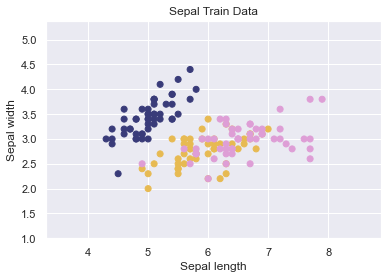

In [13]:
# step size in the mesh
h = .02 

# Create the sepal mesh to plot in
x_sepal_min, x_sepal_max = X_sepal[:, 0].min() - 1, X_sepal[:, 0].max() + 1
y_sepal_min, y_sepal_max = X_sepal[:, 1].min() - 1, X_sepal[:, 1].max() + 1
xx_sepal, yy_sepal = np.meshgrid(np.arange(x_sepal_min, x_sepal_max, h),
                     np.arange(y_sepal_min, y_sepal_max, h))
 
# Plot the sepal training points
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap='tab20b')
plt.title("Sepal Train Data")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx_sepal.min(), xx_sepal.max())
plt.ylim(yy_sepal.min(), yy_sepal.max())
plt.show()

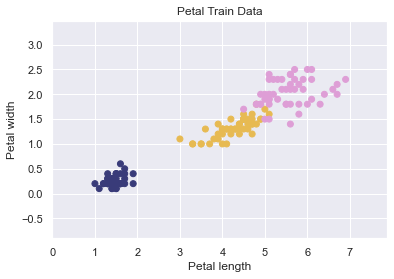

In [14]:
# Create the petal mesh to plot in
x_petal_min, x_petal_max = X_petal[:, 0].min() - 1, X_petal[:, 0].max() + 1
y_petal_min, y_petal_max = X_petal[:, 1].min() - 1, X_petal[:, 1].max() + 1
xx_petal, yy_petal = np.meshgrid(np.arange(x_petal_min, x_petal_max, h),
                     np.arange(y_petal_min, y_petal_max, h))
 
# Plot the petal training points
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap='tab20b')
plt.title("Petal Train Data")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx_petal.min(), xx_petal.max())
plt.ylim(yy_petal.min(), yy_petal.max())
plt.show()

In [24]:
# Set the different SVM kernels to be used
kernels = ['linear', 'rbf', 'poly']

# Set the regularization parameter
C = 1

# Initial the results to be stored
sepal_models = []
petal_models = []

# Fit each model to both the sepal and petal data
for kernel in kernels:
    sepal_models.append(svm.SVC(kernel=kernel, C=C, gamma='auto').fit(X_sepal, y))
    petal_models.append(svm.SVC(kernel=kernel, C=C, gamma='auto').fit(X_petal, y))

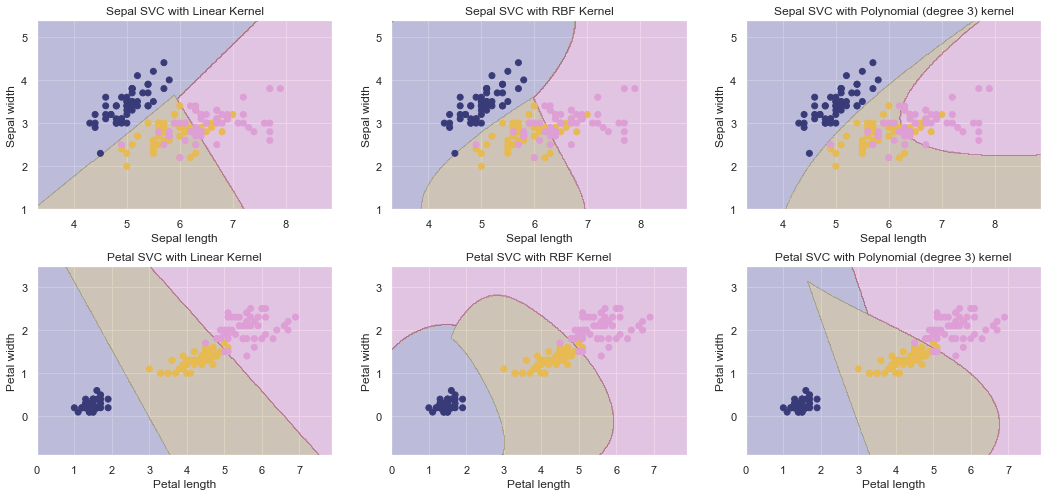

In [26]:
# Plot the decision boundaries for each kernel for both sepal and petal data

# Set the plot titles 
sepal_titles = ['Sepal SVC with Linear Kernel',
          'Sepal SVC with RBF Kernel',
          'Sepal SVC with Polynomial (degree 3) kernel']
petal_titles = ['Petal SVC with Linear Kernel',
          'Petal SVC with RBF Kernel',
          'Petal SVC with Polynomial (degree 3) kernel']

# Declare the fig and axis
fig, ax = plt.subplots(2, 3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Plot the sepal subplots
for i, (title, clf) in enumerate(zip(sepal_titles, sepal_models)):
    
    # Predict all values within 
    Z_sepal = clf.predict(np.c_[xx_sepal.ravel(), yy_sepal.ravel()])
 
    # Put the result into a color plot
    Z_sepal = Z_sepal.reshape(xx_sepal.shape)
    ax[0][i].contourf(xx_sepal, yy_sepal, Z_sepal, cmap='tab20b', alpha=0.3)
 
    # Plot also the training points
    ax[0][i].scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap='tab20b')
    ax[0][i].set_xlabel('Sepal length')
    ax[0][i].set_ylabel('Sepal width')
    ax[0][i].set_xlim(xx_sepal.min(), xx_sepal.max())
    ax[0][i].set_ylim(yy_sepal.min(), yy_sepal.max())
    ax[0][i].set_title(title)
    
# Plot the petal subplots
for i, (title, clf) in enumerate(zip(petal_titles, petal_models)):
    
    # Predict all values within 
    Z_petal = clf.predict(np.c_[xx_petal.ravel(), yy_petal.ravel()])
 
    # Put the result into a color plot
    Z_petal = Z_petal.reshape(xx_petal.shape)
    ax[1][i].contourf(xx_petal, yy_petal, Z_petal, cmap='tab20b', alpha=0.3)
 
    # Plot also the training points
    ax[1][i].scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap='tab20b')
    ax[1][i].set_xlabel('Petal length')
    ax[1][i].set_ylabel('Petal width')
    ax[1][i].set_xlim(xx_petal.min(), xx_petal.max())
    ax[1][i].set_ylim(yy_petal.min(), yy_petal.max())
    ax[1][i].set_title(title)

plt.show()

## SVM -- applied to face recognition

Next, we used SVMs to classify images via facial recognition, using the Labeled Faces in the Wild dataset.

In [59]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
# Fetch images per person
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


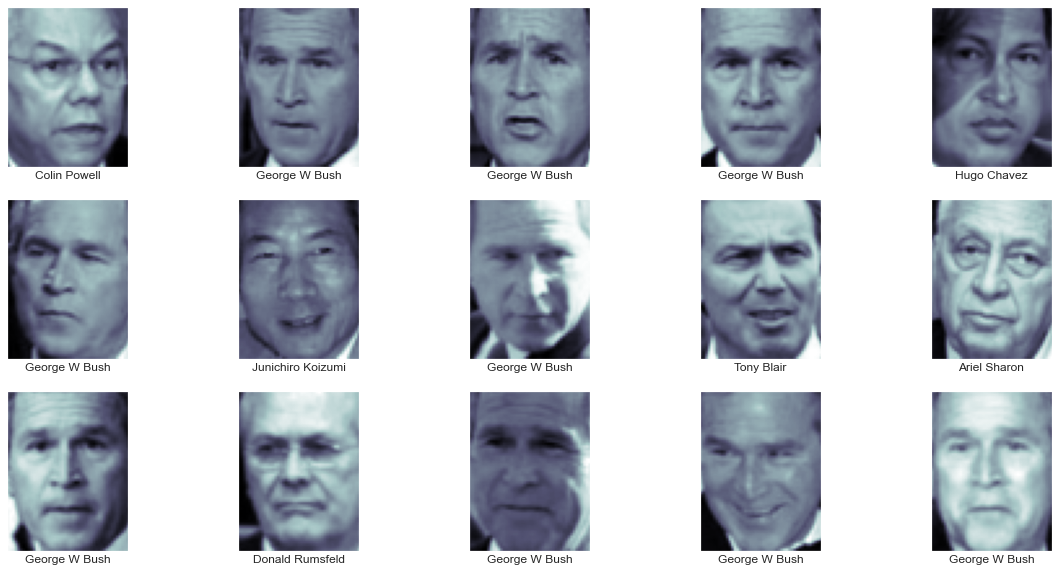

In [52]:
# Show the first 15 examples
fig, ax = plt.subplots(3, 5, figsize=(20, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

#### Use PCA for feature extraction

Given that we have 2,914 features (62 x 47 pixels), we can use PCA to extract the 150 most relevant features.

In [40]:
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [41]:
# Split the train and test data sets
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [46]:
# Use GridSearch to find the optimal parameters
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [47]:
# Predict the test set using the model with the best parameters
model = grid.best_estimator_
predicts = model.predict(X_test)

Check to see how well the model did on the first 25 samples and label the mispredicted images with red text.

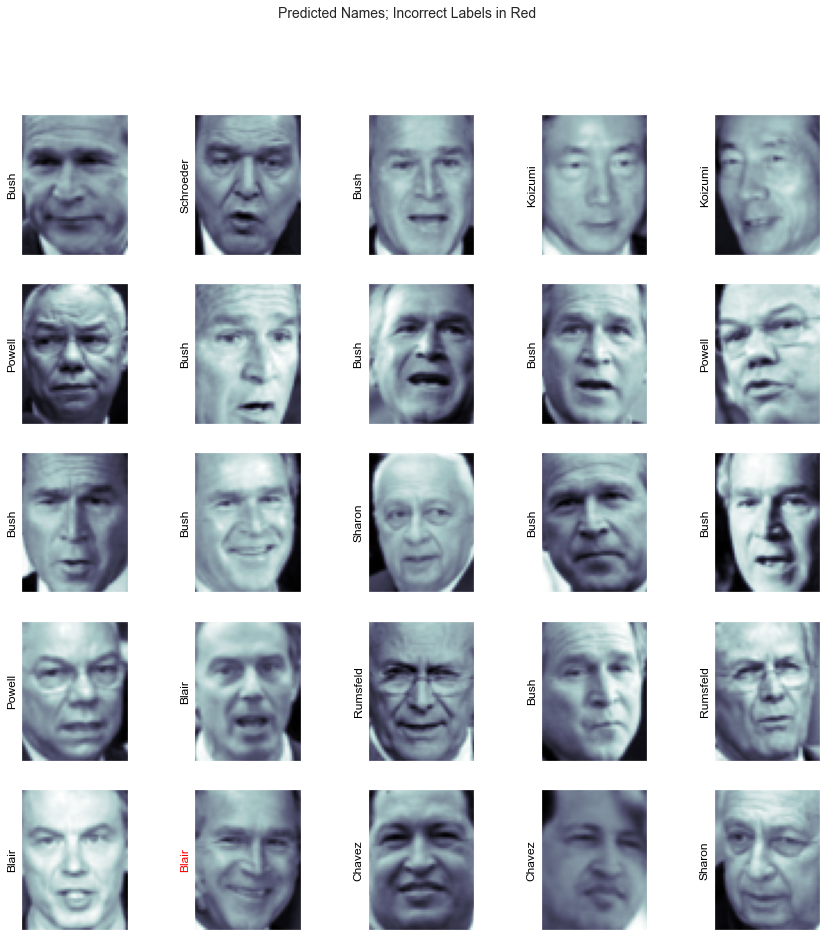

In [58]:
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[predicts[i]].split()[-1],
                   color='black' if predicts[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

#### Prediction results
Check the performance of the model.

In [61]:
# Print the classification metrics
print(classification_report(y_test, predicts, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



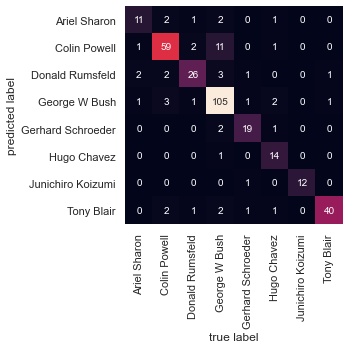

In [62]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, predicts)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Plot all the mislabeled examples.

In [81]:
# Get the incorrect array and the incorrect count
incorrect = (y_test != predicts).astype(int)
num_incorrect = np.sum(incorrect)

In [82]:
incorrect_args = np.argwhere(incorrect > 0).flatten()

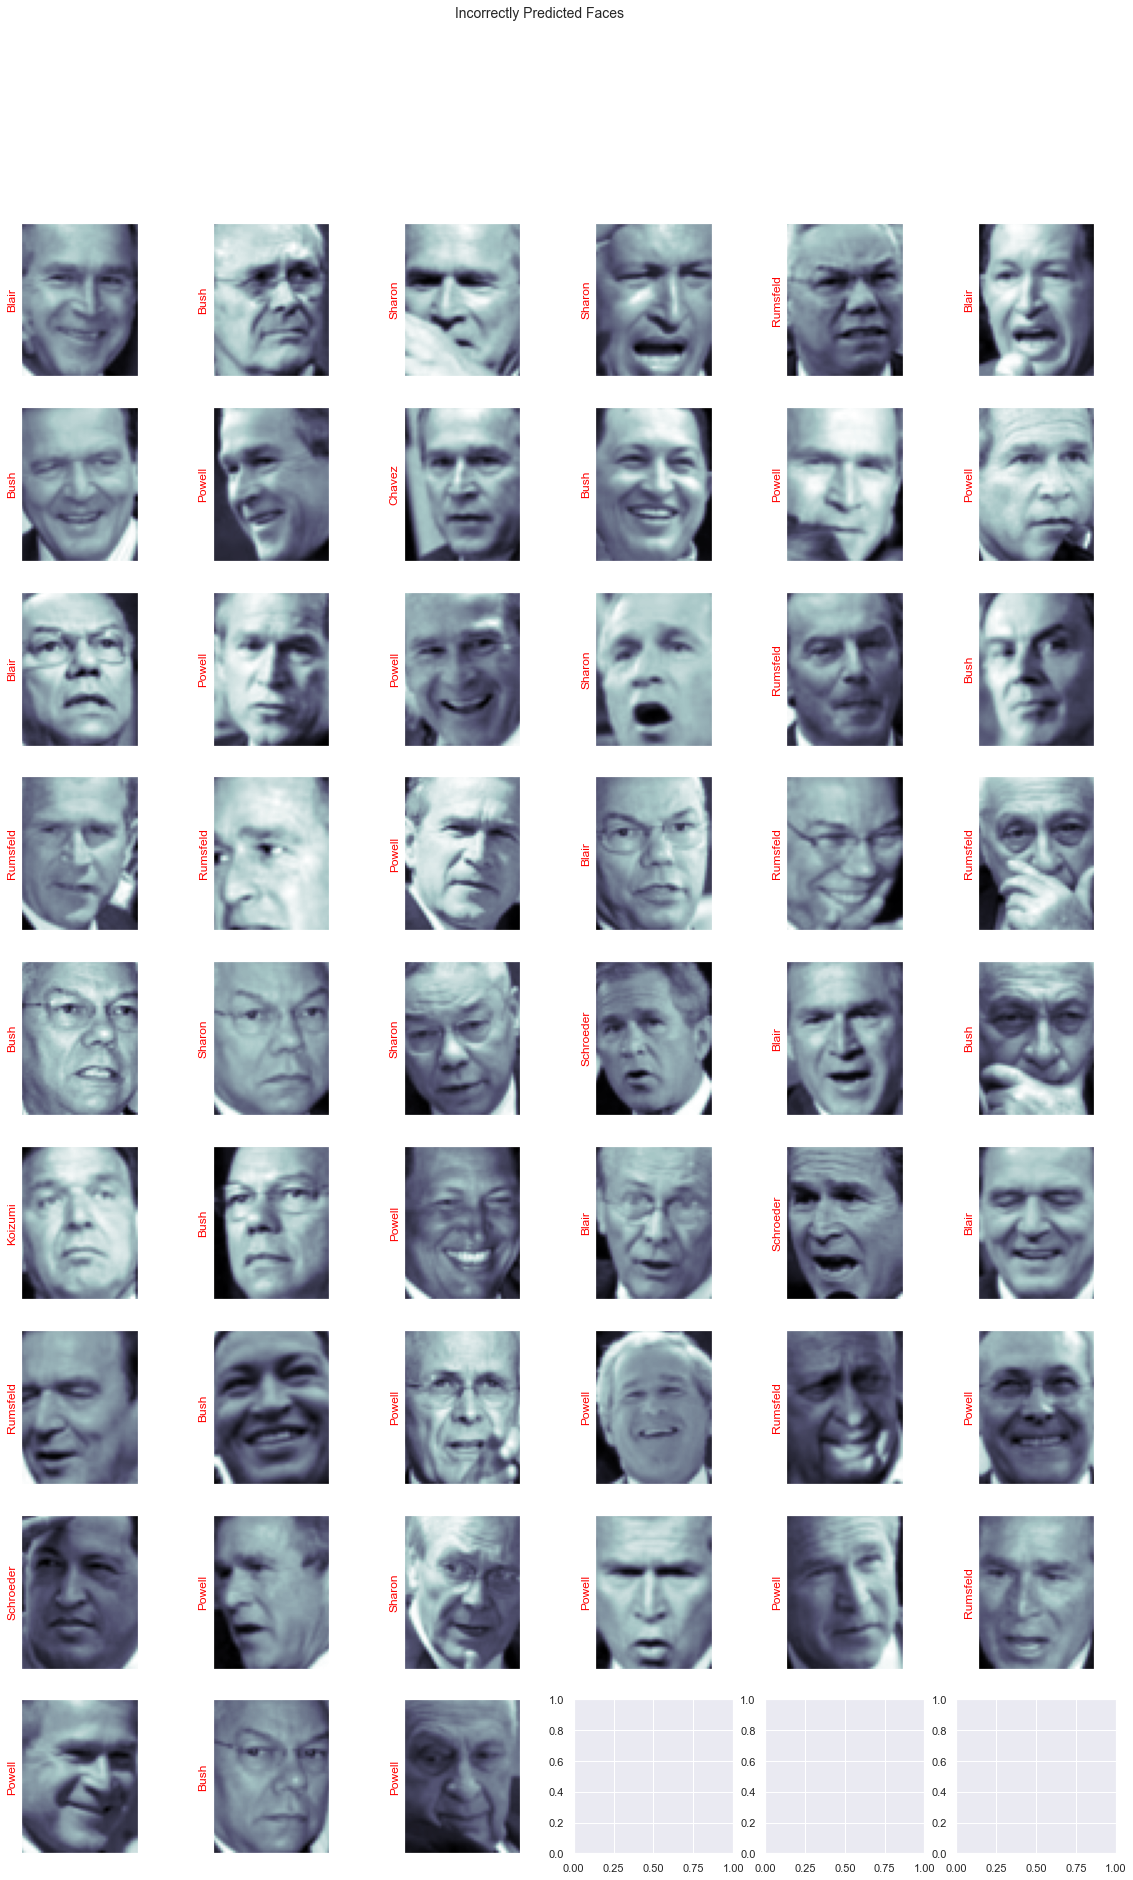

In [83]:
fig, ax = plt.subplots(9, 6, figsize=(20, 30))
for arg, axi in zip(incorrect_args, ax.flat):
    axi.imshow(X_test[arg].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[predicts[arg]].split()[-1],
                   color='red')
fig.suptitle('Incorrectly Predicted Faces', size=14);